# Load Libs

In [34]:
### Load Python Lib##### 
########
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import gauss, randint
from matplotlib import rc
from matplotlib.ticker import FixedLocator, MultipleLocator, FormatStrFormatter
import time
from scipy.special import spence
import scipy.optimize
from scipy import stats
import itertools

#very import to enable this so the plots can be showed in the page
get_ipython().magic(u'matplotlib inline')

# Use LaTeX font.
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':20})

import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=12)

Deg2Rad = 3.1415926/180.0

In [119]:
data_type = 'simple' ## or simple, mult_nofermi, mult_fsi, fermi
bin_type = 't' ## ir tp, logtp
fit_type = 'fit5' ## or fit2 but not in use now

# Load UML Fitting Results

In [120]:
## Load Fitting Resul
N=7
tbin = np.zeros(N, dtype=int)
A_1m1_fit = np.zeros(N, dtype=float)
A_2m1_fit = np.zeros(N, dtype=float)
A_3m1_fit = np.zeros(N, dtype=float)
A_0p1_fit = np.zeros(N, dtype=float)
A_1p1_fit = np.zeros(N, dtype=float)
dA_1m1_fit = np.zeros(N, dtype=float)
dA_2m1_fit = np.zeros(N, dtype=float)
dA_3m1_fit = np.zeros(N, dtype=float)
dA_0p1_fit = np.zeros(N, dtype=float)
dA_1p1_fit = np.zeros(N, dtype=float)
A_1m1_avg = np.zeros(N, dtype=float)
A_2m1_avg = np.zeros(N, dtype=float)
A_3m1_avg = np.zeros(N, dtype=float)
A_0p1_avg = np.zeros(N, dtype=float)
A_1p1_avg = np.zeros(N, dtype=float)

Asym_avg = np.zeros(N, dtype=float)
Astat_avg = np.zeros(N, dtype=float)
t = np.zeros(N, dtype=float)
tp = np.zeros(N, dtype=float)
x = np.zeros(N, dtype=float)
Q2 = np.zeros(N, dtype=float)
W = np.zeros(N, dtype=float)
dilute = np.zeros(N, dtype=float)

filename = './results/%s_dvmp_par_%s_%s.dat'%(bin_type, data_type, fit_type)
print '-- Reading files from %s'%filename
lines = open(filename,'r').readlines()

for i in range(0, N):
    values=lines[i+1].split()
#    print values
    values = np.array(values,dtype=float)  

    tbin[i]=values[0]
    
    A_1m1_avg[i] = values[2]
    A_1m1_fit[i] = values[3]
    dA_1m1_fit[i] = values[4]
    
    A_0p1_avg[i] = values[5]
    A_0p1_fit[i] = values[6]
    dA_0p1_fit[i] = values[7]

    A_2m1_avg[i] = values[8]
    A_2m1_fit[i] = values[9]
    dA_2m1_fit[i] = values[10]
    
    A_3m1_avg[i] = values[11]
    A_3m1_fit[i] = values[12]
    dA_3m1_fit[i] = values[13]
    
    A_1p1_avg[i] = values[14]
    A_1p1_fit[i] = values[15]
    dA_1p1_fit[i] = values[16]
    
    Asym_avg[i] = values[19]
    Astat_avg[i] = values[20]

    t[i] = values[21]
    tp[i] = values[22]
    x[i] = values[23]
    Q2[i] = values[24]
    W[i] = values[25]
    dilute[i] = values[26]


-- Reading files from ./results/t_dvmp_par_simple_fit5.dat


## Plot Asym vs. t

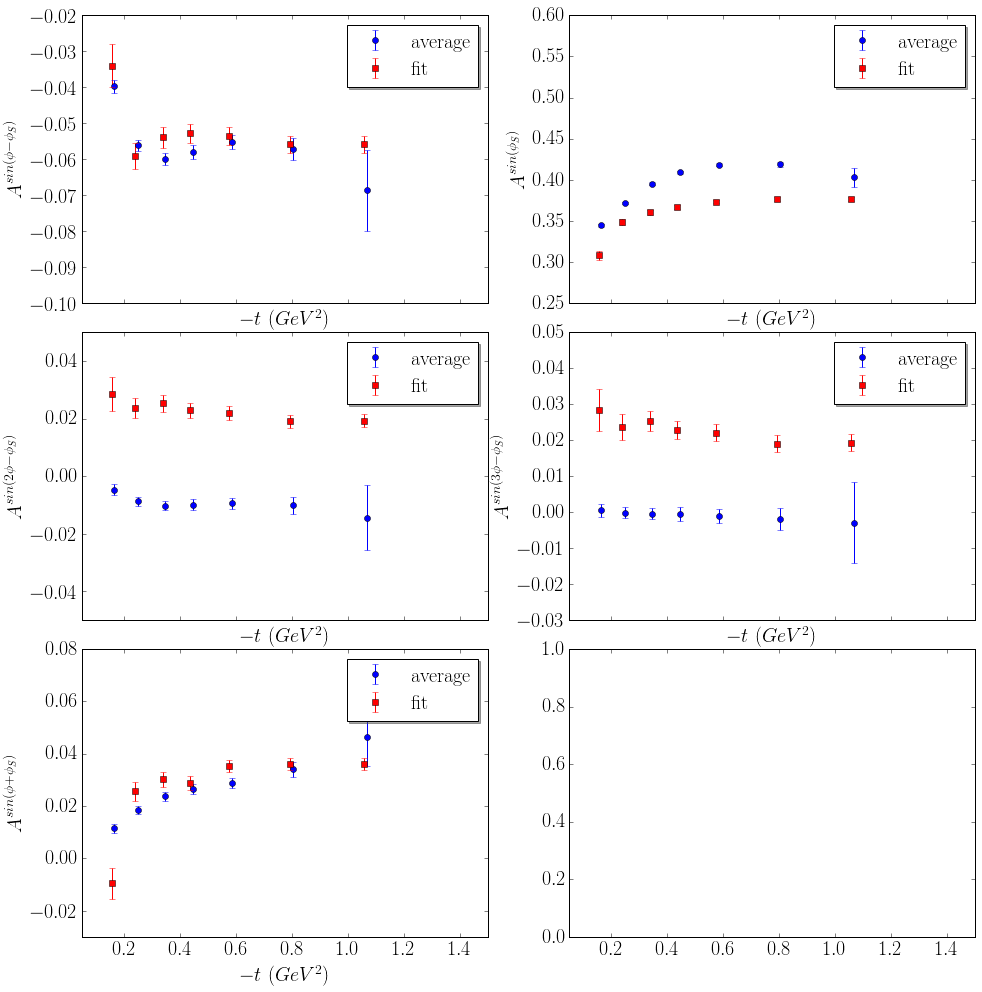

In [121]:
f,axes1 = plt.subplots(3,2, sharex=True, figsize=(16, 16))
f.subplots_adjust(bottom=0.1, top=0.9, hspace=0.1)

# Subplot for sin(phi-pihS).
axes1[0][0].errorbar(t, A_1m1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[0][0].errorbar(t-0.01, A_1m1_fit, yerr=dA_1m1_fit, fmt='s',color='red',label='fit')
axes1[0][0].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[0][0].set_xlim(0.05, 1.5)
axes1[0][0].set_ylabel('$A^{sin(\phi-\phi_S)}$') # label, y-axis
axes1[0][0].set_ylim(-0.1, -0.02)

# Subplot for sin(phi-pihS).
axes1[0][1].errorbar(t, A_0p1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[0][1].errorbar(t-0.01, A_0p1_fit, yerr=dA_0p1_fit, fmt='s',color='red',label='fit')
axes1[0][1].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[0][1].set_xlim(0.05, 1.5)
axes1[0][1].set_ylabel('$A^{sin(\phi_S)}$') # label, y-axis
axes1[0][1].set_ylim(0.25, 0.6)

# Subplot for sin(phi-pihS).
axes1[1][0].errorbar(t, A_2m1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[1][0].errorbar(t-0.01, A_2m1_fit, yerr=dA_2m1_fit, fmt='s',color='red',label='fit')
axes1[1][0].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[1][0].set_xlim(0.05, 1.5)
axes1[1][0].set_ylabel('$A^{sin(2\phi-\phi_S)}$') # label, y-axis
axes1[1][0].set_ylim(-0.05, 0.05)

# Subplot for sin(phi-pihS).
axes1[1][1].errorbar(t, A_3m1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[1][1].errorbar(t-0.01, A_2m1_fit, yerr=dA_3m1_fit, fmt='s',color='red',label='fit')
axes1[1][1].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[1][1].set_xlim(0.05, 1.5)
axes1[1][1].set_ylabel('$A^{sin(3\phi-\phi_S)}$') # label, y-axis
axes1[1][1].set_ylim(-0.03, 0.05)


# Subplot for sin(phi-pihS).
axes1[2][0].errorbar(t, A_1p1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[2][0].errorbar(t-0.01, A_1p1_fit, yerr=dA_1p1_fit, fmt='s',color='red',label='fit')
axes1[2][0].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[2][0].set_xlim(0.05, 1.5)
axes1[2][0].set_ylabel('$A^{sin(\phi+\phi_S)}$') # label, y-axis
axes1[2][0].set_ylim(-0.03, 0.08)

lg = axes1[0][0].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)
lg = axes1[0][1].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)
lg = axes1[1][0].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)
lg = axes1[1][1].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)
lg = axes1[2][0].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)

plt.savefig('asym_comp_%s_%s.png'%(data_type, bin_type), bbox_inches='tight')
plt.savefig('asym_comp_%s_%s.pdf'%(data_type, bin_type), bbox_inches='tight')

## Individual plots

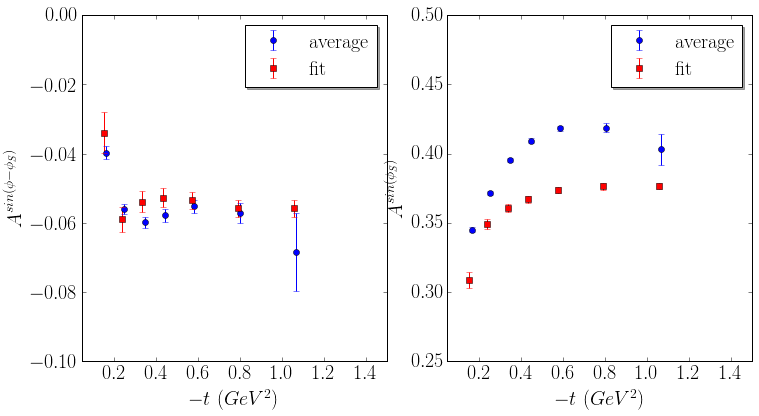

In [122]:
f,axes1 = plt.subplots(1,2, sharex=True, figsize=(12, 6))
f.subplots_adjust(bottom=0.1, top=0.9, hspace=0.1)

# Subplot for sin(phi-pihS).
axes1[0].errorbar(t, A_1m1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[0].errorbar(t-0.01, A_1m1_fit, yerr=dA_1m1_fit, fmt='s',color='red',label='fit')
axes1[0].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[0].set_xlim(0.05, 1.5)
axes1[0].set_ylabel('$A^{sin(\phi-\phi_S)}$') # label, y-axis
axes1[0].set_ylim(-0.1, 0.0)

# Subplot for sin(phi-pihS).
axes1[1].errorbar(t, A_0p1_avg, yerr=Astat_avg, fmt='o',color='blue',label='average')
axes1[1].errorbar(t-0.01, A_0p1_fit, yerr=dA_0p1_fit, fmt='s',color='red',label='fit')
axes1[1].set_xlabel('$-t~(GeV^{2}$)') # label, y-axis
axes1[1].set_xlim(0.05, 1.5)
axes1[1].set_ylabel('$A^{sin(\phi_S)}$') # label, y-axis
axes1[1].set_ylim(0.25, 0.5)

lg = axes1[0].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)
lg = axes1[1].legend(loc='upper right', shadow='true', fontsize='medium',numpoints=1)

plt.savefig('asym2_comp_%s_%s.png'%(data_type, bin_type), bbox_inches='tight')
plt.savefig('asym2_comp_%s_%s.pdf'%(data_type, bin_type), bbox_inches='tight')

# Load ($\phi$, $\phi_S$) bins for each t-bin

In [124]:
### Loading the Q2 Bin#1 theoretical calculations
N=7
N1 = 12
N2 = 12
Bin = (N, N1, N2)
PhiS = np.zeros(Bin, dtype=float)
PhiH = np.zeros(Bin, dtype=float)
Asym_avg = np.zeros(Bin, dtype=float)
dAsym_avg = np.zeros(Bin, dtype=float)
Asym_fit = np.zeros(Bin, dtype=float)
dAsym_fit = np.zeros(Bin, dtype=float)
Asym_cal = np.zeros(Bin, dtype=float)
dAsym_cal = np.zeros(Bin, dtype=float)
GOOD_fit = np.zeros(Bin, dtype=float)
GOOD_cal = np.zeros(Bin, dtype=float)

for i in range(0,7):
    filename = './database/BIN_%s_dvmp_par_%s_%s_%d_0.dat'%(bin_type, data_type, fit_type, i+1)
    print '-- Reading files from %s'%filename
    lines = open(filename,'r').readlines()

    for j in range(0, N1):
        for k in range(0, N2):
            N_phi = k + j*N2 +3
            values=lines[N_phi].split()
            values = np.array(values, dtype=float)
                       
            PhiS[i][j][k] = values[0] * Deg2Rad
            PhiH[i][j][k] = values[1] * Deg2Rad
            Asym_avg[i][j][k] = values[4]
            dAsym_avg[i][j][k] = values[5]
            Asym_fit[i][j][k] = values[8]
            dAsym_fit[i][j][k] = values[9]
            Asym_cal[i][j][k] = values[10]
            dAsym_cal[i][j][k] = values[11]   
            GOOD_fit[i][j][k] = values[12]            
            GOOD_cal[i][j][k] = values[13]            

            #print "i=%d: %d  %d  %12.4f  %12.4f  %12.4e  %12.4e"%(i,j,k, PhiS[i][j][k]/Deg2Rad, PhiH[i][j][k]/Deg2Rad, Ncnt[i][j][k], Nstat[i][j][k])  

-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_1_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_2_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_3_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_4_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_5_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_6_0.dat
-- Reading files from ./database/BIN_t_dvmp_par_simple_fit5_7_0.dat


## Produce Histrograms weighted by Asym

In [129]:
import ROOT
ROOT.gStyle.SetOptStat(0)

In [140]:
## Load Angle Bins
I=0

hasym_avg1 = ROOT.TH2F('hasym_avg1', '$\phi_h$ vs $\phi_S ~weighted~ by~ Asym', 12, 0.,360., 12, 0.,360.)
hasym_avg1.SetXTitle('#phi_{h} (Degree)')
hasym_avg1.SetYTitle('#phi_{S} (Degree)')
hasym_avg1.GetXaxis().CenterTitle(1)
hasym_avg1.GetYaxis().CenterTitle(1)
hasym_fit1 = hasym_avg1.Clone()
hasym_fit1.SetName('hasym_fit1')
hasym_cal1 = hasym_avg1.Clone()
hasym_cal1.SetName('hasym_cal1')

hasym_avg2 = hasym_avg1.Clone()
hasym_avg2.SetName('hasym_avg2')
hasym_fit2 = hasym_fit1.Clone()
hasym_fit2.SetName('hasym_fit2')
hasym_cal2 = hasym_cal1.Clone()
hasym_cal2.SetName('hasym_cal2')

hasym_avg3 = hasym_avg1.Clone()
hasym_avg3.SetName('hasym_avg3')
hasym_fit3 = hasym_fit1.Clone()
hasym_fit3.SetName('hasym_fit3')
hasym_cal3 = hasym_cal1.Clone()
hasym_cal3.SetName('hasym_cal3')

hasym_avg4 = hasym_avg1.Clone()
hasym_avg4.SetName('hasym_avg4')
hasym_fit4 = hasym_fit1.Clone()
hasym_fit4.SetName('hasym_fit4')
hasym_cal4 = hasym_cal1.Clone()
hasym_cal4.SetName('hasym_cal4')

hasym_avg5 = hasym_avg1.Clone()
hasym_avg5.SetName('hasym_avg5')
hasym_fit5 = hasym_fit1.Clone()
hasym_fit5.SetName('hasym_fit5')
hasym_cal5 = hasym_cal1.Clone()
hasym_cal5.SetName('hasym_cal5')

hasym_avg6 = hasym_avg1.Clone()
hasym_avg6.SetName('hasym_avg6')
hasym_fit6 = hasym_fit1.Clone()
hasym_fit6.SetName('hasym_fit6')
hasym_cal6 = hasym_cal1.Clone()
hasym_cal6.SetName('hasym_cal6')

hasym_avg7 = hasym_avg1.Clone()
hasym_avg7.SetName('hasym_avg7')
hasym_fit7 = hasym_fit1.Clone()
hasym_fit7.SetName('hasym_fit7')
hasym_cal7 = hasym_cal1.Clone()
hasym_cal7.SetName('hasym_cal7')



for j in range(0, N1):
    for k in range(0, N2):
        I=0
        hasym_avg1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=1
        hasym_avg2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=2
        hasym_avg3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=3
        hasym_avg4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=4
        hasym_avg5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=5
        hasym_avg6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

        I=6
        hasym_avg7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
        hasym_fit7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
        hasym_cal7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])
    
# hist_file = ROOT.TFile('histo_asym.root','recreate')

# hasym_avg1.Write()
# hasym_fit1.Write()
# hasym_cal1.Write()

# hasym_avg2.Write()
# hasym_fit2.Write()
# hasym_cal2.Write()

# hasym_avg3.Write()
# hasym_fit3.Write()
# hasym_cal3.Write()

# hasym_avg4.Write()
# hasym_fit4.Write()
# hasym_cal4.Write()

# hasym_avg5.Write()
# hasym_fit5.Write()
# hasym_cal5.Write()

# hasym_avg6.Write()
# hasym_fit6.Write()
# hasym_cal6.Write()

# hasym_avg7.Write()
# hasym_fit7.Write()
# hasym_cal7.Write()


# hist_file.Close()

Warning in <TFile::Append>: Replacing existing TH1: hasym_avg1 (Potential memory leak).


In [140]:
I=0

hgood_cal1 = ROOT.TH2F('hgood_avg1', '', 146, 0.,145., 146, -2.,2.)
hgood_cal1.SetXTitle('(#phi_{h}, #phi_{S}) bin number i')
hgood_cal1.SetYTitle('(A_{i,Data}-A_{i,UML})/#sqrt{#delta A_{i,Data}}^2+#delta A_{i, UML}^2')
hgood_cal1.GetXaxis().CenterTitle(1)
hgood_cal1.GetYaxis().CenterTitle(1)

hgood_fit1 = ROOT.TH2F('hgood_fit1', '', 146, 0.,145., 146, -2.,2.)
hgood_fit1.SetXTitle('(#phi_{h}, #phi_{S}) bin number i')
hgood_fit1.SetYTitle('(A_{i,Data}-A_{i,UML})/#sqrt{#delta A_{i,Data}}^2+#delta A_{i, UML}^2')
hgood_fit1.GetXaxis().CenterTitle(1)
hgood_fit1.GetYaxis().CenterTitle(1)

hcom_cal1 = ROOT.TH2F('hgood_avg1', '', 146, 0.,145., 146, -1.,1.)
hcom_cal1.SetXTitle('(#phi_{h}, #phi_{S}) bin number i')
hcom_cal1.SetYTitle('A_i(#phi_{h}, #phi_{S))')
hcom_cal1.GetXaxis().CenterTitle(1)
hcom_cal1.GetYaxis().CenterTitle(1)

hcom_fit1 = hcom_cal1.Clone()
hcom_fit1.SetName('hcom_avg1')
hcom_avg1 = hcom_cal1.Clone()
hcom_avg1.SetName('hcom_avg1')



# for j in range(0, N1):
#     for k in range(0, N2):
#         I=0
#         hasym_avg1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=1
#         hasym_avg2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=2
#         hasym_avg3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=3
#         hasym_avg4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=4
#         hasym_avg5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=5
#         hasym_avg6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])

#         I=6
#         hasym_avg7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_avg[I][j][k])
#         hasym_fit7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_fit[I][j][k])
#         hasym_cal7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, Asym_cal[I][j][k])
    


Warning in <TFile::Append>: Replacing existing TH1: hasym_avg1 (Potential memory leak).


## Make Asymmetries vs.   ($\phi_h$, $\phi_S$) Plots for 8 t-bins

In [152]:
c = ROOT.TCanvas("c","c",800,800)
ROOT.enableJSVis()
c.Divide(2,2)

c.cd(1)
hasym_avg1.Draw('colz')
hasym_avg1.SetTitle('T-Bin#1, from MC Model')
hasym_avg1.GetXaxis().SetTitleSize(15)
hasym_avg1.GetYaxis().SetTitleSize(15)

c.cd(2)
hasym_fit1.Draw('colz')
hasym_fit1.SetTitle('T-Bin#1, from Fitting')
hasym_fit1.GetXaxis().SetTitleSize(15)
hasym_fit1.GetYaxis().SetTitleSize(15)

c.cd(3)
hasym_avg4.Draw('colz')
hasym_avg4.SetTitle('T-Bin#4, from MC Model')
hasym_avg4.GetXaxis().SetTitleSize(15)
hasym_avg4.GetYaxis().SetTitleSize(15)

c.cd(4)
hasym_fit4.Draw('colz')
hasym_fit4.SetTitle('T-Bin#4, from Fitting')
hasym_fit4.GetXaxis().SetTitleSize(15)
hasym_fit4.GetYaxis().SetTitleSize(15)

c.Draw()
#ROOT.disableJSVis()
c.Print('asym_comp.pdf')
c.Print('asym_comp.png')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file asym_comp.pdf has been created
Info in <TCanvas::Print>: png file asym_comp.png has been created


## Make Asymmetry vs $sin(\phi_h-\phi_S)$ for one t-bin

In [16]:
I=7

c1 = ROOT.TCanvas("c1","c1",800,600)
ROOT.enableJSVis()
c1.cd()

hphi = ROOT.TH2F('hphi', 'Asym vs. sin($\phi_h$ -$\phi_S$)', 12, -1.3,1.3, 12, -2.3,2.3)
hphi.SetXTitle('sin($\phi_h$ -$\phi_S$')
hphi.SetYTitle('$A_{UT}^{sin(\phi_h -\phi_S})$')
hphi.GetXaxis().CenterTitle(1)
hphi.GetYaxis().CenterTitle(1)

for j in range(0, N1):
    for k in range(0, N2):
        hphi.Fill(SinPhi_PhiS[i][j][k], AUT_1m1[I][j][k])
hphi.Draw('colz')
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hphi (Potential memory leak).
